In [3]:
import pandas as pd

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("VNL2023.csv")

In [5]:
data.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


In [7]:
data.isnull().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [8]:
data.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [9]:
data.describe(include = "all")

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
count,131,131,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131
unique,131,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Ichikawa Yuki,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OH
freq,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42
mean,NaN,NaN,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198,NaN
std,NaN,NaN,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939,NaN
min,NaN,NaN,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000,NaN
25%,NaN,NaN,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000,NaN
50%,NaN,NaN,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000,NaN
75%,NaN,NaN,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000,NaN


In [10]:
data.duplicated().sum()

0

In [14]:
numeric_cols = data.select_dtypes(include = ["int" , "float"]).columns
corr_matrix = data[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


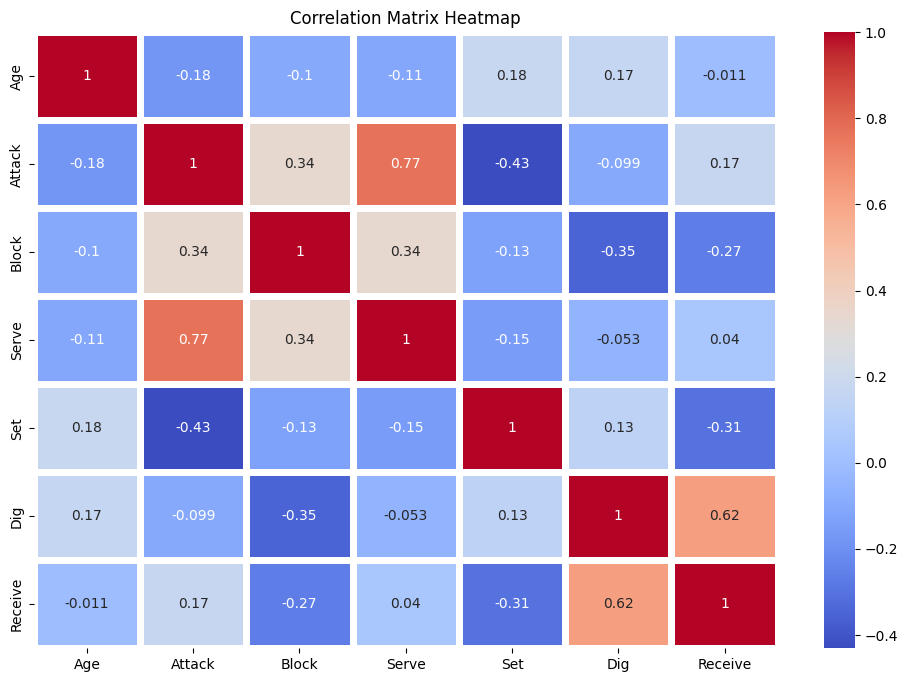

In [17]:
plt.figure(figsize = (12 , 8))
sns.heatmap(corr_matrix , annot = True , cmap = "coolwarm",linewidths = 5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
position_counts = data["Position"].value_counts()
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

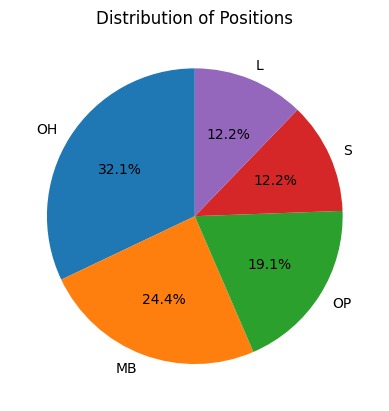

In [19]:
plt.pie(position_counts , labels = position_counts.index , autopct = "%1.1f%%" , startangle = 90)
plt.title("Distribution of Positions")
plt.show()

In [23]:
avg_attack_by_country = data.groupby("Country")["Attack"].mean()
avg_attack_by_country.sort_values(ascending = False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

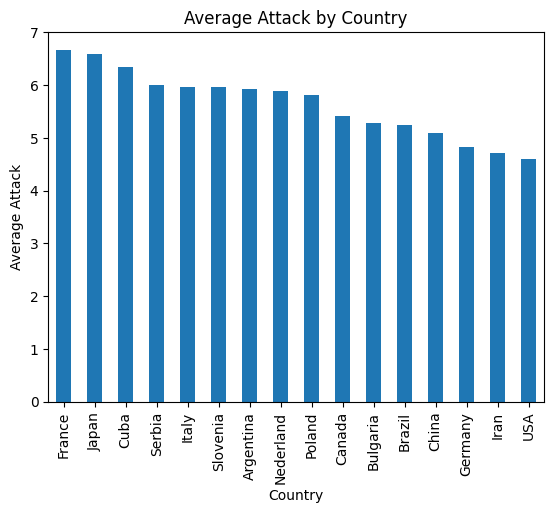

In [24]:
avg_attack_by_country.sort_values(ascending = False).plot(kind = "bar")
plt.title("Average Attack by Country")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()

In [25]:
avg_serve_by_age = data.groupby("Age")["Serve"].mean()
avg_serve_by_age

Age
19    0.200000
20    0.880000
21    0.770000
22    0.534286
23    0.526667
24    0.640667
25    0.165714
26    0.681053
27    0.662500
28    0.667273
29    0.477500
30    0.429231
31    0.910000
32    0.290000
33    0.321429
34    0.026667
35    0.666667
36    0.660000
37    0.270000
38    0.400000
41    0.000000
Name: Serve, dtype: float64

In [29]:
data.groupby(["Country" , "Position"])["Attack"].mean().reset_index().sort_values(ascending = False , by = "Attack").head(20)

,Country,Position,Attack
28,Cuba,OP,15.000000
52,Japan,OH,13.665000
8,Brazil,OP,12.460000
48,Italy,OP,12.330000
68,Serbia,OP,12.330000
58,Nederland,OP,10.540000
2,Argentina,OH,10.120000
33,France,OP,9.713333
27,Cuba,OH,9.705000
12,Bulgaria,OH,9.500000


In [30]:
data.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

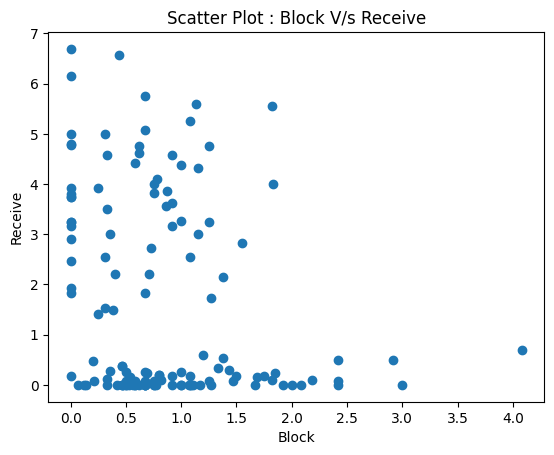

In [31]:
plt.scatter(data["Block"] , data["Receive"])
plt.title("Scatter Plot : Block V/s Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

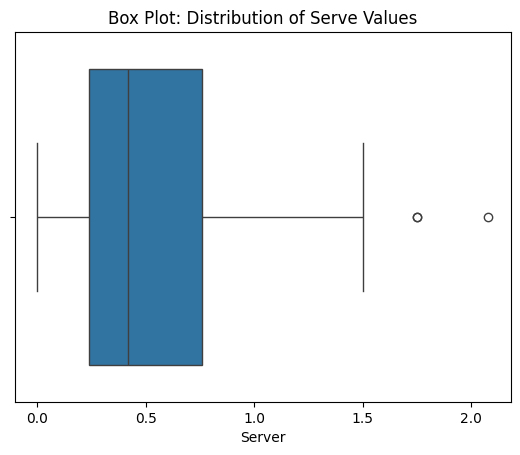

In [32]:
sns.boxplot(x = data["Serve"])
plt.title("Box Plot: Distribution of Serve Values")
plt.xlabel("Server")
plt.show()

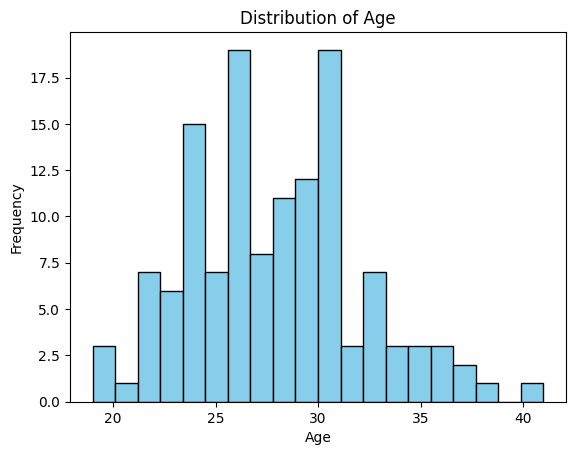

In [33]:
plt.hist(data["Age"], bins = 20 , color = "skyblue" , edgecolor = "black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

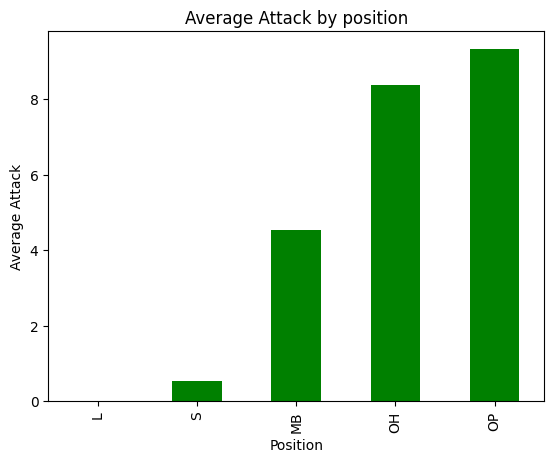

In [40]:
avg_attack_by_position = data.groupby("Position")["Attack"].mean()
avg_attack_by_position.sort_values(ascending = True).plot(kind = "bar" , color = "green")
plt.title("Average Attack by position")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

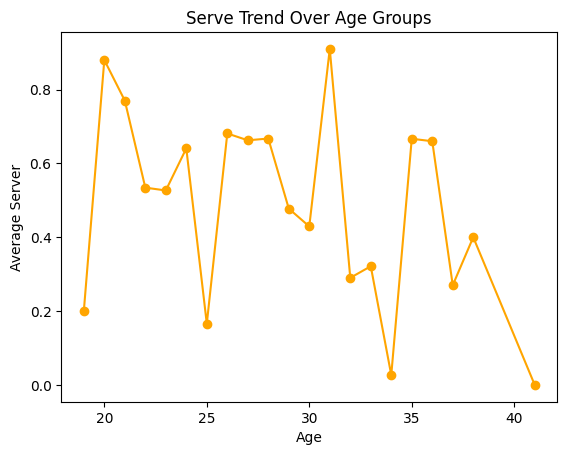

In [ ]:
serve_trend_by_age = data.groupby("Age")["Serve"].mean()
serve_trend_by_age.plot(kind = "line" , marker = "o" , linestyle = "-" , color = "orange")
plt.title("Serve Trend Over Age Groups")
plt.xlabel("Age")
plt.ylabel("Average Server")
plt.show()

In [42]:
total_attack_block_by_country = data.groupby("Country")[["Attack" , "Block"]].sum()

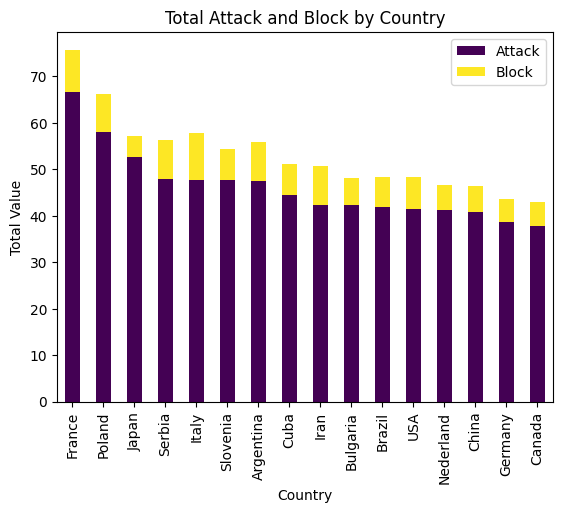

In [45]:
total_attack_block_by_country.sort_values(ascending = False , by = "Attack").plot(kind = "bar" , stacked = True , colormap = "viridis")
plt.title("Total Attack and Block by Country")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.show()